In [165]:
import pandas as  pd
import requests
import html5lib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from matplotlib import cm
import statsmodels.api as sm
from patsy import dmatrices
from datetime import datetime
import re
import seaborn as sns

In [137]:
# Import HTML data via pd.read_html and conver to pandas Series objects
sportsDF = pd.read_html('http://www.ultimatemovierankings.com/Top-400-sports-movies/',
                       header=0)

In [138]:
# Convert data to pandas DataFrame
for lists in sportsDF:
    sportsDF = pd.DataFrame(lists)

In [140]:
sportsDF.drop('Rank', axis=1, inplace=True)

In [142]:
sportsDF.rename(columns={'Movie (Year)':'Movies', 'Star of Movie': 'Star',
                        'Adjusted Domestic Box Office (Millions)': 'Adj_Dom_Gross',
                        'Critic Audience Rating': 'Crit_Aud_Rating',
                        'Oscar Nom / Win': 'Oscar_Nom', 'Cogerson Movie Score':
                        'Cog_Score'}, inplace=True)

In [143]:
sportsDF

,Movies,Sport,Star,Adj_Dom_Gross,Crit_Aud_Rating,Oscar_Nom,Cog_Score
0,Rocky (1976),Boxing,Sylvester Stallone,$446.60,79.3%,10 / 03,92.77
1,"Pride of the Yankees, The (1942)",Baseball,Gary Cooper,$225.70,84.0%,11 / 01,85.40
2,Heaven Can Wait (1978),Football,Warren Beatty,$283.40,77.5%,09 / 01,85.12
3,Jerry Maguire (1996),Football,Tom Cruise,$282.60,78.5%,05 / 01,84.24
4,Chariots of Fire (1981),Olympics,Ben Cross,$172.10,79.0%,07 / 04,80.97
5,Million Dollar Baby (2004),Boxing,Clint Eastwood & Morgan Freeman,$131.50,87.0%,07 / 04,79.15
6,"Blind Side, The (2009)",Football,Sandra Bullock,$276.90,71.5%,02 / 01,75.90
7,National Velvet (1945),Horse Racing,Elizabeth Taylor & Mickey Rooney,$212.70,79.5%,05 / 02,72.82
8,Seabiscuit (2003),Horse Racing,Tobey Maguire & Jeff Bridges,$161.60,75.5%,07 / 00,70.88
9,"Great Race, The (1965)",Car Racing,Tony Curtis & Jack Lemmon,$199.80,74.0%,05 / 01,69.86


In [145]:
# Clean the DataFrame, strip $ from Domestic Gross numbers, strip % from Critic/Audience Rating
# remove the year from the Movies titles and create separate Year column converting values to
# datetime object
sportsDF['Adj_Dom_Gross'] = sportsDF['Adj_Dom_Gross'].map(lambda x: float(x.strip('$')))
sportsDF['Crit_Aud_Rating'] = sportsDF['Crit_Aud_Rating'].map(lambda x: float(x.strip('%')))
sportsDF['Oscar_Nom'] = sportsDF['Oscar_Nom'].map(lambda x:  int(str(x)[:2]))
sportsDF['Year'] = sportsDF['Movies'].map(lambda x: str(x)[-5:])
sportsDF['Year'] = sportsDF['Year'].map(lambda x: x.strip(')'))
sportsDF['Year'] = sportsDF['Year'].map(lambda x: datetime.strptime(x, '%Y'))
sportsDF['Year'] = sportsDF['Year'].map(lambda x: x.year)
sportsDF['Sport'] = sportsDF['Sport'].str.capitalize()
sportsDF['Movies'] = sportsDF['Movies'].map(lambda x: str(x)[:-6])

In [146]:
sportsDF

,Movies,Sport,Star,Adj_Dom_Gross,Crit_Aud_Rating,Oscar_Nom,Cog_Score,Year
0,Rocky,Boxing,Sylvester Stallone,446.60,79.3,10,92.77,1976
1,"Pride of the Yankees, The",Baseball,Gary Cooper,225.70,84.0,11,85.40,1942
2,Heaven Can Wait,Football,Warren Beatty,283.40,77.5,9,85.12,1978
3,Jerry Maguire,Football,Tom Cruise,282.60,78.5,5,84.24,1996
4,Chariots of Fire,Olympics,Ben Cross,172.10,79.0,7,80.97,1981
5,Million Dollar Baby,Boxing,Clint Eastwood & Morgan Freeman,131.50,87.0,7,79.15,2004
6,"Blind Side, The",Football,Sandra Bullock,276.90,71.5,2,75.90,2009
7,National Velvet,Horse racing,Elizabeth Taylor & Mickey Rooney,212.70,79.5,5,72.82,1945
8,Seabiscuit,Horse racing,Tobey Maguire & Jeff Bridges,161.60,75.5,7,70.88,2003
9,"Great Race, The",Car racing,Tony Curtis & Jack Lemmon,199.80,74.0,5,69.86,1965


In [147]:
by_genre = sportsDF.groupby('Sport')

In [193]:
by_year = sportsDF.groupby('Year')
by_year_gross = by_year['Adj_Dom_Gross'].mean()
by_year_gross

Year
1931     32.500000
1932     82.800000
1933     34.900000
1934     87.700000
1935     43.800000
1936     58.850000
1937     49.566667
1938     30.000000
1939     47.100000
1940     71.850000
1941     76.300000
1942    167.650000
1945    212.700000
1947     85.650000
1948    107.200000
1949     84.450000
1950     45.650000
1951     41.600000
1952     47.900000
1953     63.600000
1954      4.900000
1955     60.100000
1956     54.400000
1957     26.000000
1958     77.100000
1960     41.400000
1961     91.800000
1962     29.025000
1963     18.700000
1965    133.775000
           ...    
1986     47.920000
1987     19.200000
1988     28.235714
1989     50.634286
1990    118.550000
1991     41.600000
1992     59.718182
1993     78.780000
1994     41.558333
1995     34.325000
1996     71.541667
1997     19.500000
1998     47.455556
1999     37.433000
2000     44.908333
2001     34.714286
2002     28.138333
2003     69.200000
2004     49.624167
2005     39.990500
2006     45.358333
2007   

In [149]:
genre_sums = by_genre['Adj_Dom_Gross'].sum()
genre_sums.sort_values(inplace=True)

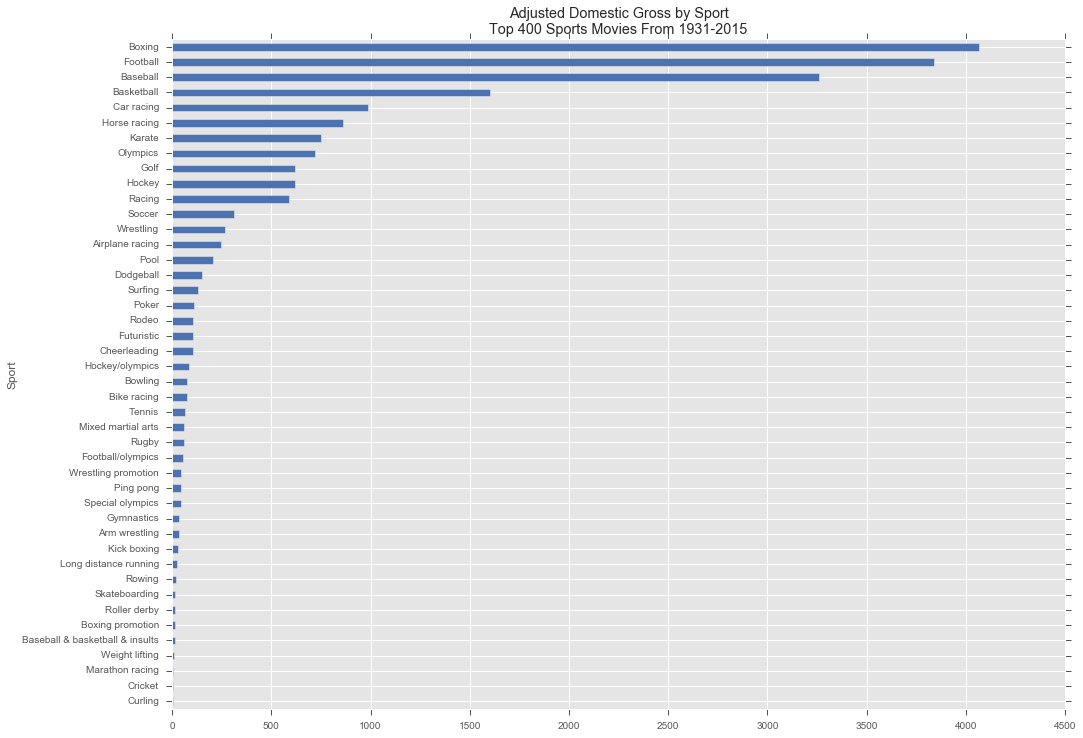

In [150]:
# Plot the Adjusted Domestic Gross for each specific sport
plt.rcParams['figure.figsize'] = 16, 12
genre_sums.plot(kind='barh', title='Adjusted Domestic Gross by Sport\nTop 400 Sports Movies From 1931-2015')

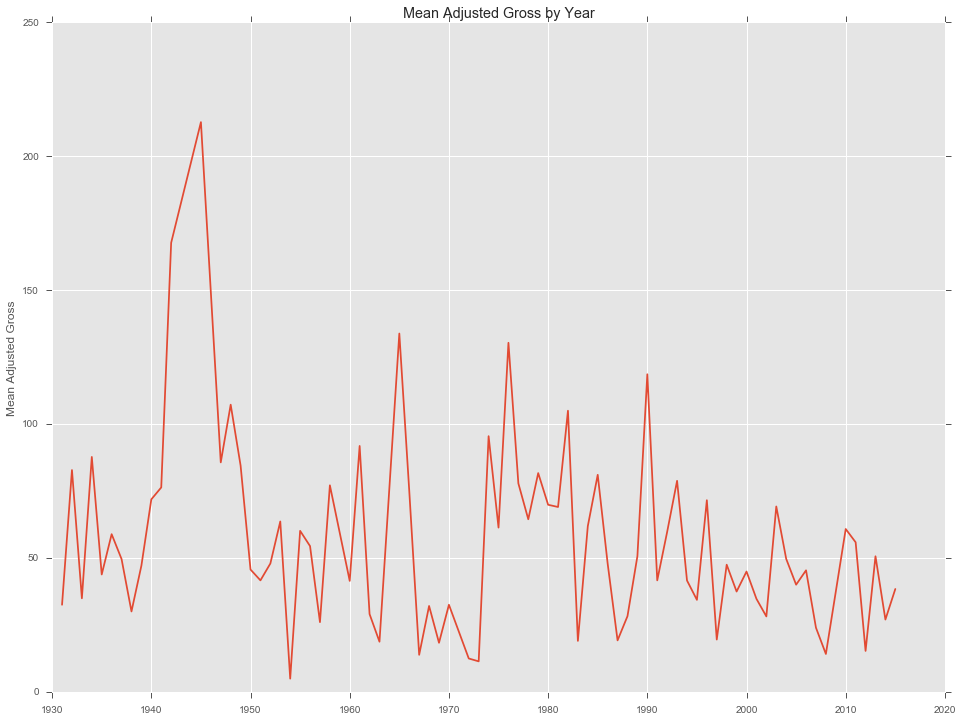

In [151]:
plt.rcParams['figure.figsize'] = 16, 12
plt.plot(by_year_gross)
plt.title("Mean Adjusted Gross by Year")
plt.ylabel("Mean Adjusted Gross")

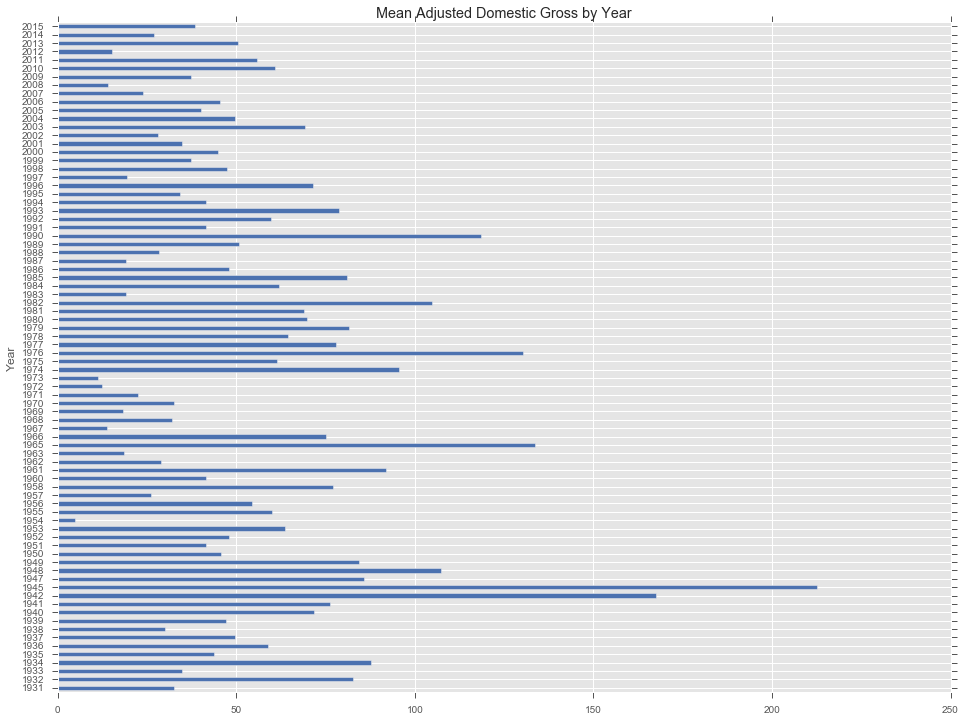

In [152]:
plt.rcParams['figure.figsize'] = 16, 12
by_year_gross.plot(kind='barh', title='Mean Adjusted Domestic Gross by Year')

This section attempts to perform Order of Least Squares regression to deterimine if Critic/Audience Rating is a good predictor for Domestic Gross for sports movies

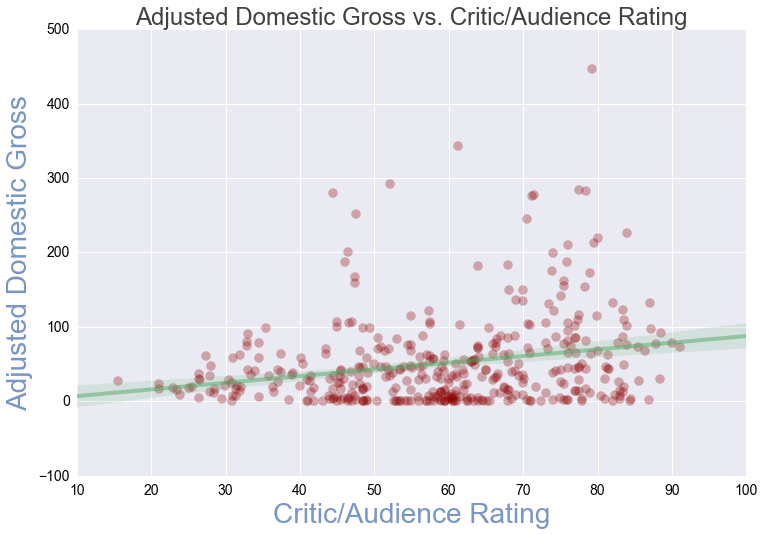

In [155]:
# Plot a regression analysis usig Critic/Audience Rating as a predictor
# for Adjusted Domestic Gross

g = sns.regplot(x="Crit_Aud_Rating", y="Adj_Dom_Gross", data=sportsDF,
                scatter_kws={"color":"darkred","alpha":0.3,"s":90},
                line_kws={"color":"g","alpha":0.5,"lw":4},marker="o",x_jitter=.1)
# Set the size of the graph from here
g.figure.set_size_inches(12,8)
# Set the Title of the graph from here
g.axes.set_title('Adjusted Domestic Gross vs. Critic/Audience Rating', fontsize=24,color="black",alpha=0.75)
# Set the xlabel of the graph from here
g.set_xlabel('Critic/Audience Rating',size = 28,color="b",alpha=0.75)
# Set the ylabel of the graph from here
g.set_ylabel('Adjusted Domestic Gross',size = 28,color="b",alpha=0.75)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

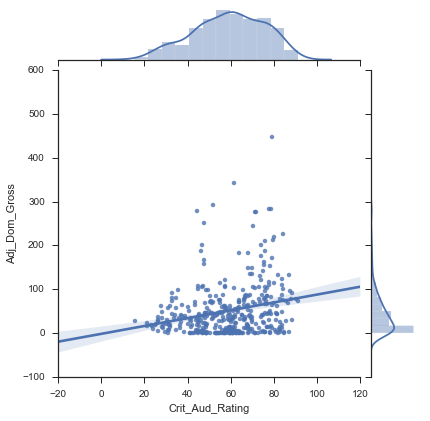

In [132]:
g = sns.JointGrid(x="Crit_Aud_Rating", y="Adj_Dom_Gross", data=sportsDF)  
g.plot(sns.regplot, sns.distplot)

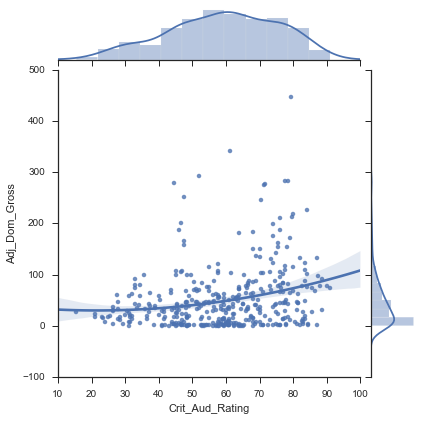

In [135]:
g = sns.JointGrid(x="Crit_Aud_Rating", y="Adj_Dom_Gross", data=sportsDF)  
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot) 

In [171]:
# Perform Order of Least Squares Regression Analysis to predict Adjusted Domestic Gross
# using Critic/Audience Rating
y, X = dmatrices('Adj_Dom_Gross ~ Crit_Aud_Rating', data=sportsDF, return_type='dataframe')

In [172]:
X.head()

,Intercept,Crit_Aud_Rating
0,1,79.3
1,1,84.0
2,1,77.5
3,1,78.5
4,1,79.0


In [173]:
y.head()

,Adj_Dom_Gross
0,446.6
1,225.7
2,283.4
3,282.6
4,172.1


In [174]:
model = sm.OLS(y, X)
results = model.fit()

In [176]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Adj_Dom_Gross   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     24.20
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           1.27e-06
Time:                        12:10:36   Log-Likelihood:                -2208.4
No. Observations:                 402   AIC:                             4421.
Df Residuals:                     400   BIC:                             4429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -2.0461     11.173     -0.183      0.855       -24.010    19.918
Crit_Aud_Rating     0.8973      0.182      4.920      0.000         0.539     1.256
==============================================================================
Omnibus:                      220.746   Durbin-Watson:                   0.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1416.364
Skew:                           2.331   Prob(JB):                    2.76e-308
Kurtosis:                      10.926   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
results.rsquared

0.057052522966678954

In [177]:
results.params

Intercept         -2.046131
Crit_Aud_Rating    0.897276
dtype: float64

In [180]:
model2 = sm.OLS(y, X)
results2 = model2.fit()

In [181]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Adj_Dom_Gross   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     24.20
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           1.27e-06
Time:                        12:17:44   Log-Likelihood:                -2208.4
No. Observations:                 402   AIC:                             4421.
Df Residuals:                     400   BIC:                             4429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -2.0461     11.173     -0.183      0.855       -24.010    19.918
Crit_Aud_Rating     0.8973      0.182      4.920      0.000         0.539     1.256
==============================================================================
Omnibus:                      220.746   Durbin-Watson:                   0.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1416.364
Skew:                           2.331   Prob(JB):                    2.76e-308
Kurtosis:                      10.926   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This sections begins to look at other features and dependent variables using the current data set for sports movies.  In particular, we begin to examine if Critic/Audience Rating and Adjusted Domestic Gross are good predictors for Oscar Nominations.

In [ ]:
g = sns.PairGrid(sportsDF, y_vars=['Oscar_Nom'], x_vars=['Crit_Aud_Rating', 'Adj_Dom_Gross'], size=8)
g.map(sns.regplot, scatter_kws={"color":"darkred","alpha":0.75,"s":30},
     line_kws={"color":"r","alpha":0.5,"lw":4},marker="o",x_jitter=.1)
g.set(ylim=(-1, 12))

Perform Order of Least Squares Regression Analysis using the new features of Critic/Audience Rating and Adjusted Domestic Gross as a predictor for Oscar Nominations.

In [184]:
y2, X2 = dmatrices('Oscar_Nom ~ Crit_Aud_Rating + Adj_Dom_Gross', data=sportsDF, return_type='dataframe')

In [185]:
model2 = sm.OLS(y2, X2)
results2 = model2.fit()

In [187]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Oscar_Nom   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     84.46
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           2.59e-31
Time:                        12:19:23   Log-Likelihood:                -672.36
No. Observations:                 402   AIC:                             1351.
Df Residuals:                     399   BIC:                             1363.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -1.7169      0.245     -7.006      0.000        -2.199    -1.235
Crit_Aud_Rating     0.0285      0.004      6.920      0.000         0.020     0.037
Adj_Dom_Gross       0.0099      0.001      9.030      0.000         0.008     0.012
==============================================================================
Omnibus:                      261.742   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2644.596
Skew:                           2.693   Prob(JB):                         0.00
Kurtosis:                      14.353   Cond. No.                         350.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""